In [1]:
from matplotlib import pyplot
#from keras.models import Sequential, load_model
#from keras.layers import Dense, LSTM, Lambda, Dropout
#from keras.utils import to_categorical

import hammlet
import rnn
import tokenizer

2024-02-11 15:58:54.855012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## tokenizer.py
## (default sonnet text data: 'data/shakespeare.txt' and 'data/spenser.txt)
## ========================================================================

data = tokenizer.load_data()
sonnets = tokenizer.sequence_full_sonnet(tokenizer.tokenize_lpunc, data)
#print(sonnets)

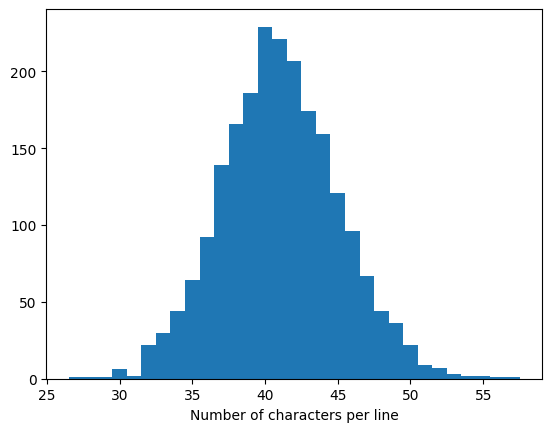

In [3]:
shakespeare_data = tokenizer.load_data(data_files=["data/shakespeare.txt"])
lines = tokenizer.sequence_each_line(tokenizer.tokenize_nopunc, shakespeare_data)

char_len = [len(' '.join(l)) for l in lines]
n, bins, _ = pyplot.hist(char_len, bins=[i - 0.5 for i in range(min(char_len), max(char_len) + 2)])
pyplot.xlabel('Number of characters per line')
pyplot.show()

In [4]:
## rnn.py: pre-process and load RNN training sequences
## ===================================================

#sequences = rnn._process_sequences(sonnets)
#char2vec = rnn._map_characters(sonnets)   
#char_sequences = []
#for seq in sequences:
#    char_sequences.append([char2vec[c] for c in seq]) 

char_sequences, char2vec = rnn.load_rnn_data()
print(f"Total Number of (40-char) Sequences: {len(char_sequences)}")
print(f"[char2vec]:\n{char2vec}")

Total Number of (40-char) Sequences: 137247
[char2vec]:
{' ': 0, '!': 1, '&': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37}


In [5]:
## rnn.py: train/load/save model
## =============================

X, Y = rnn.generate_training_data(char_sequences, char2vec)
print(X.shape)
print(Y.shape)

# RNN Model: 
#   - 3 LSTM layers of 600 units (each with 20% dropout)
#   - 1 Dense layer with `softmax` activation
#model = Sequential([
#    LSTM(600, input_shape(X.shape[1], X.shape[2]), return_sequences=True),
#    Dropout(0.2),
#    LSTM(600, return_sequences=True),
#    Dropout(0.2),
#    LSTM(600),
#    Dropout(0.2)
#    Dense(len(char2vec), activation='softmax')
#])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X, Y, batch_size=128, epochs=40)
#model.summary()
#model.save("LSTM-3L-600U-40E")

#model = rnn.train_rnn_model(X, Y, char2vec)
model = rnn.load_rnn_model("LSTM-3L-600U-40E")
model.summary()

temperature = 0.5
lambda_model = rnn.add_lambda_layer(model, char2vec, X, temperature)
lambda_model.summary()

(137247, 40, 38)
(137247, 38)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 40, 600)           1533600   
                                                                 
 dropout_1 (Dropout)         (None, 40, 600)           0         
                                                                 
 lstm_2 (LSTM)               (None, 40, 600)           2882400   
                                                                 
 dropout_2 (Dropout)         (None, 40, 600)           0         
                                                                 
 lstm_3 (LSTM)               (None, 600)               2882400   
                                                                 
 dropout_3 (Dropout)         (None, 600)               0         
                                                                 
 dense_1 (Dense)        

In [6]:
## hammlet.py: generate sonnets
## ============================
seed = "my mistress' eyes are nothing like the sun,"

sonnet = hammlet._gen_rnn_poem(lambda_model, char2vec, X, seed)
print(sonnet)

#sonnet = hammlet.generate_rnn_sonnet("LSTM-3L-600U-40E", seed=seed, temperature=1.5)
#print(sonnet)

My mistress' eyes are nothing like the sun,
Coral is far more red,
Than her lips red, if snow be worthy of thy self thy beauty's field,
The which three times thrice haply hath me,
Suffine in them shall still will play the tyrant,
The which beholding me with melancholy.
Until life's composition,
And they that level at my self sweet self bring:
And when i weal and love them soul the warling madst with thought of earthly things and seeks kind.
Then if for ofe dispease,
The which that touches me to more are reason up to death.
More flowers i noted,
Yet i not then say 'now i love you best,' when i all weary had the chase forsook,
The worst was thinks the shame which i do most in her own presence decked,

